In [11]:
#importing librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#data read
data = pd.read_excel('6.Forgy.xlsx')
print(data)

    x   y
0   9   3
1  15   6
2  15  12
3  21  12
4  24  16
5  30  20
6  35  24


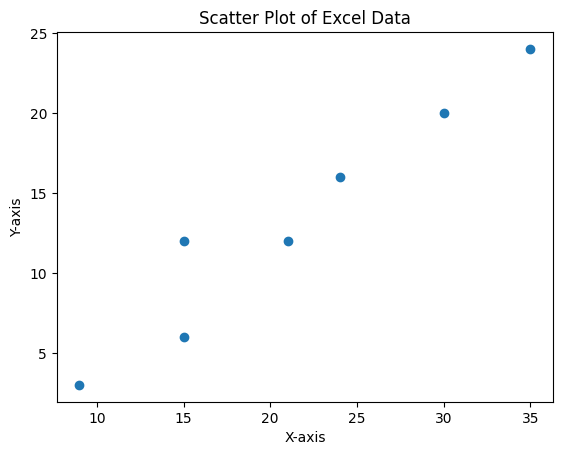

In [12]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Excel Data')
plt.show()

In [13]:
#Printind datapoints as a list
x_values = data['x'].tolist()
y_values = data['y'].tolist()
X = [[x, y] for x, y in zip(x_values, y_values)]
print('X=' ,X)

X= [[9, 3], [15, 6], [15, 12], [21, 12], [24, 16], [30, 20], [35, 24]]


In [15]:
# forgy clustering er main kajgulo ei module a.. implementation of forgy clustring from scratch
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
def forgy_clustering(data, k):
    centroids = data[:k]
    iteration = 0
    while True:
        iteration += 1
        print(f"Iteration {iteration}")
        print("Current centroids:")
        for centroid in centroids:
            print(centroid)
        print()   
        clusters = [[] for _ in range(k)]  
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
            
        for inner_list in clusters:
                print(inner_list)    
        #  Calculate new centroids
        new_centroids = []
        for cluster in clusters:
            new_centroid = np.mean(cluster, axis=0)
            new_centroids.append(new_centroid)
        # Check if centroids have changed
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    print("Final centroids:")
    for centroid in centroids:
        print(centroid)
    return clusters
data = np.array(X)
k = int(input("Enter the number of cluster(k): "))
clusters = forgy_clustering(data, k)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}:")
    for point in cluster:
        print(point)
    print()

Iteration 1
Current centroids:
[9 3]
[15  6]

[array([9, 3])]
[array([15,  6]), array([15, 12]), array([21, 12]), array([24, 16]), array([30, 20]), array([35, 24])]
Iteration 2
Current centroids:
[9. 3.]
[23.33333333 15.        ]

[array([9, 3]), array([15,  6])]
[array([15, 12]), array([21, 12]), array([24, 16]), array([30, 20]), array([35, 24])]
Iteration 3
Current centroids:
[12.   4.5]
[25.  16.8]

[array([9, 3]), array([15,  6]), array([15, 12])]
[array([21, 12]), array([24, 16]), array([30, 20]), array([35, 24])]
Iteration 4
Current centroids:
[13.  7.]
[27.5 18. ]

[array([9, 3]), array([15,  6]), array([15, 12])]
[array([21, 12]), array([24, 16]), array([30, 20]), array([35, 24])]
Final centroids:
[13.  7.]
[27.5 18. ]
Cluster 1:
[9 3]
[15  6]
[15 12]

Cluster 2:
[21 12]
[24 16]
[30 20]
[35 24]



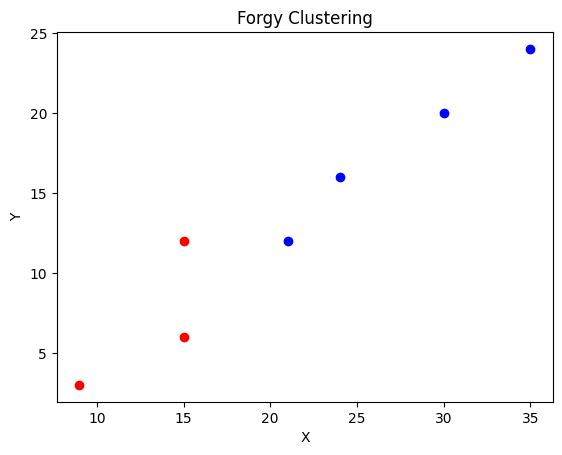

In [16]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']  
for i, cluster in enumerate(clusters):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f"Cluster {i+1}")

#plt.grid(True)
#plt.xlim(min(x) - 10, max(x) + 10)
#plt.ylim(min(y) - 10, max(y) + 10)
#plt.axhline(0, color='black', linewidth=0.5)
#plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Forgy Clustering')
plt.show()